In [90]:
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [91]:
# TODO 每次绘图时修改数据来源文件
expr_res_data_path = '20231017_19_56_47_headup_detect_delay_test_new_0.3_0.7_tx2-cloud-raw.csv'

df = pd.read_csv(expr_res_data_path)
df = df[1:]
max_fps = 30
df.loc[df['fps'] >= 30, 'fps'] = max_fps
resolution_map = {"360p": 0, "480p": 1, "720p": 2, "1080p": 3}
df['resolution'] = df['resolution'].replace(resolution_map)

df

,n_loop,frame_id,total,up,fps,resolution,delay,face_detection,face_alignment
1,2,2.0,24,21,20,0,0.645099,host,host
2,3,4.0,21,20,20,0,0.371084,host,host
3,4,5.0,21,20,10,0,0.557784,host,host
4,5,6.0,21,20,10,0,0.557471,host,host
5,6,8.0,21,20,10,0,0.386153,host,host
...,...,...,...,...,...,...,...,...,...
726,727,3605.0,21,20,5,0,0.193966,host,host
727,728,3610.0,21,20,5,0,0.194429,host,host
728,729,3615.0,21,20,5,0,0.194178,host,host
729,730,3620.0,21,20,5,0,0.195723,host,host


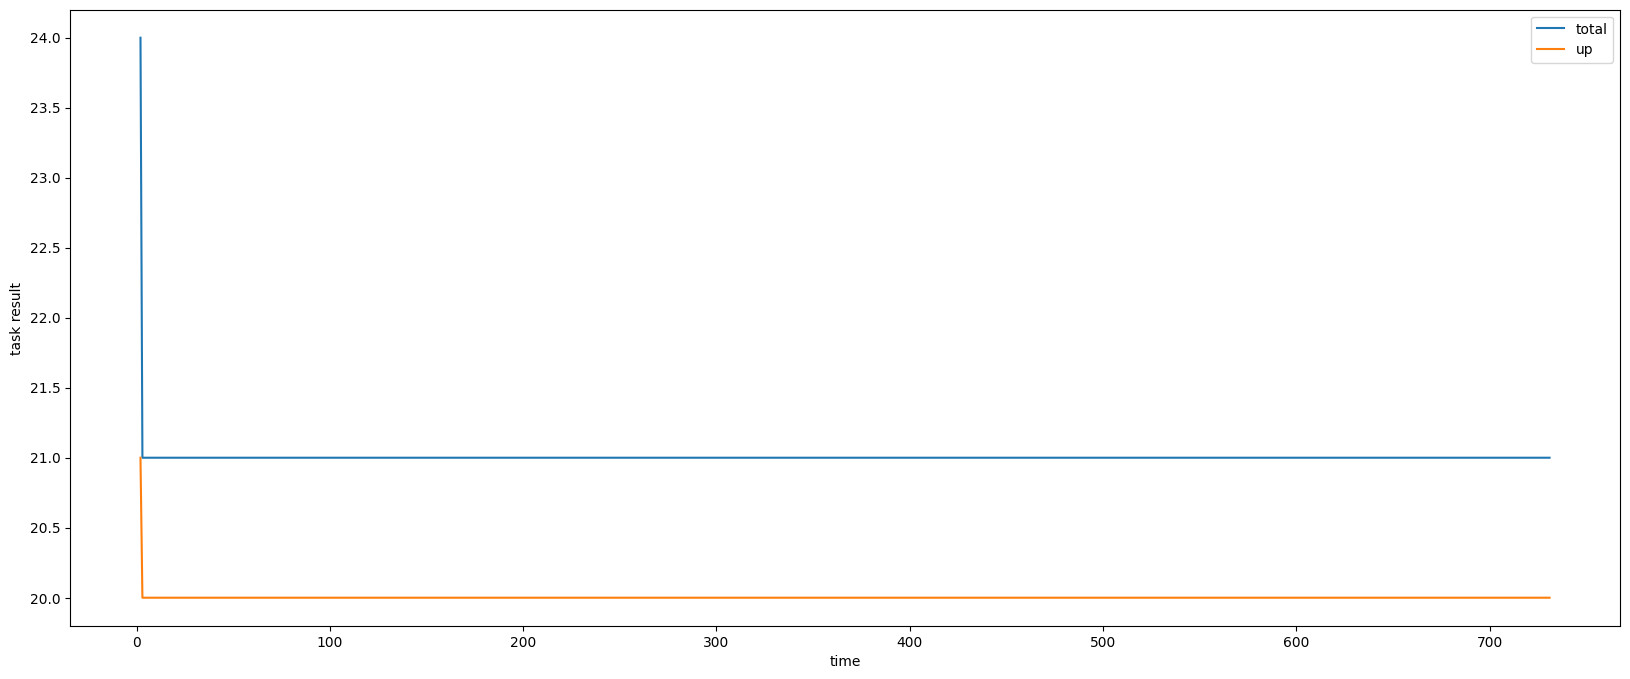

In [92]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
ax.plot(df['n_loop'], df['total'], label='total')
ax.plot(df['n_loop'], df['up'], label='up')
# ax.title.set_text('total/up vs time')
plt.xlabel('time')
plt.ylabel('task result')
ax.legend()

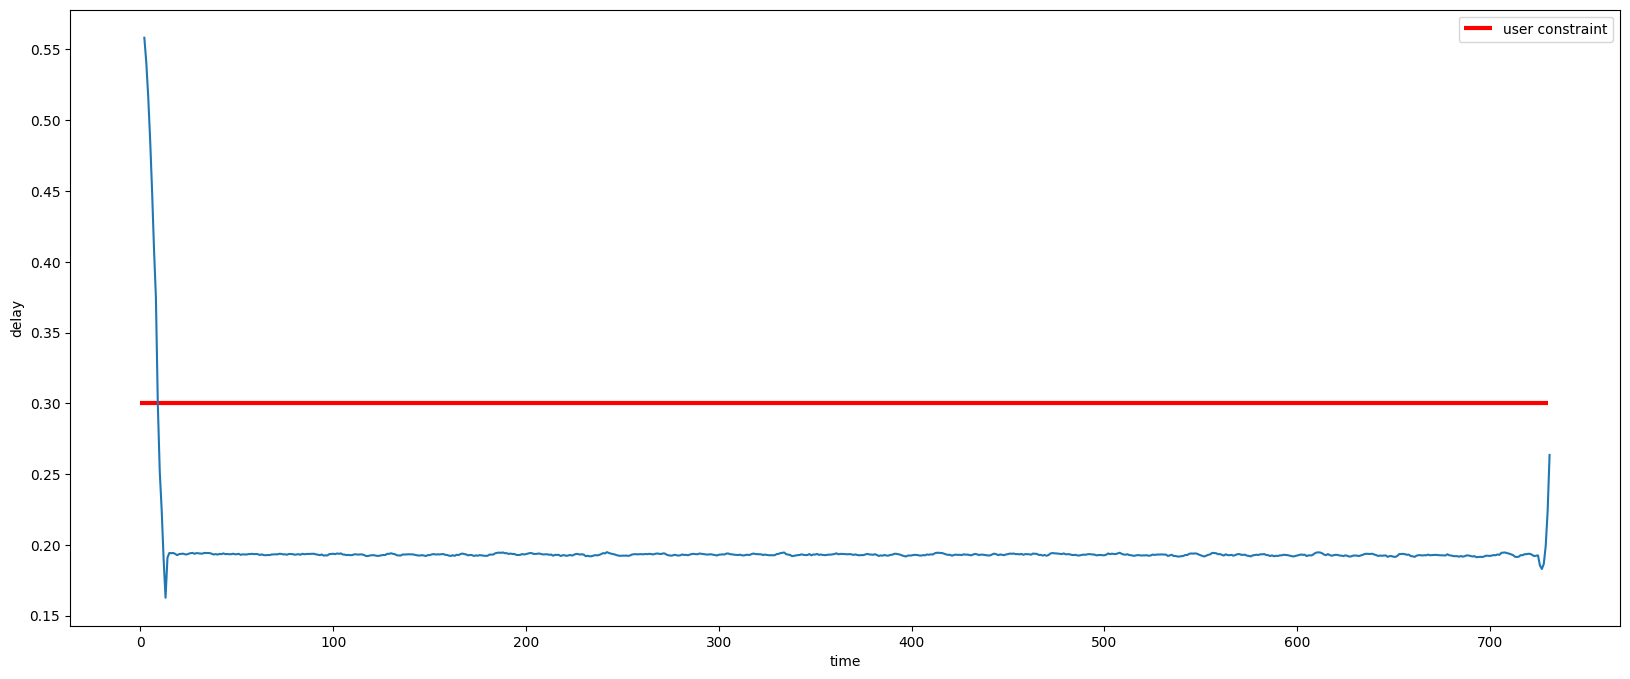

In [93]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
ax.hlines(y=0.3, xmin=0, xmax=len(df['n_loop']), linewidth=3, color='r', label='user constraint')
ax.plot(df['n_loop'], scipy.signal.savgol_filter(df['delay'], 11, 3))
# ax.plot(df['n_loop'], df['delay'])
# ax.title.set_text('delay vs time')
plt.xlabel('time')
plt.ylabel('delay')
ax.legend()
plt.savefig('delay.png')

Text(0, 0.5, 'frame rate')

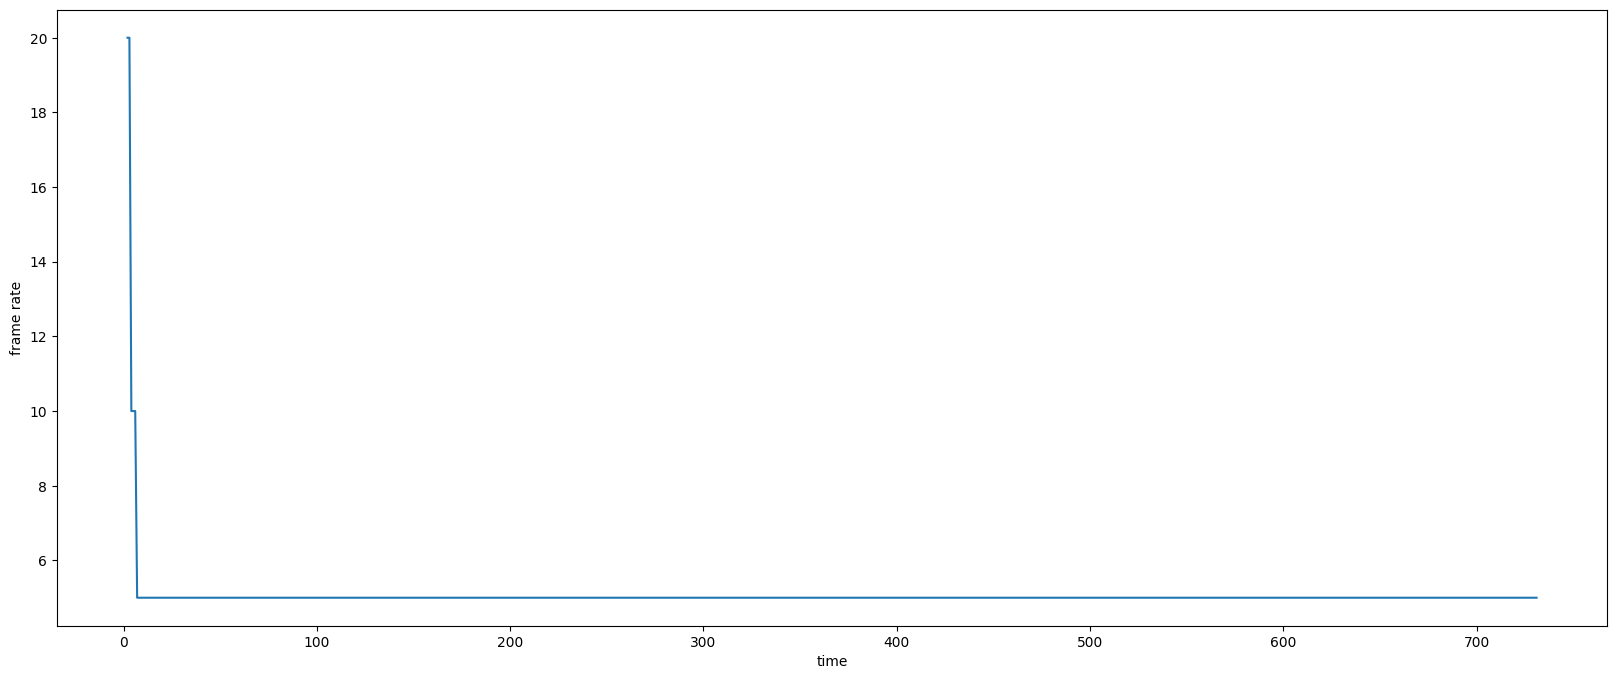

In [94]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
ax.plot(df['n_loop'], df['fps'])
# ax.title.set_text('frame rate vs time')
plt.xlabel('time')
plt.ylabel('frame rate')

Text(0, 0.5, 'resolution')

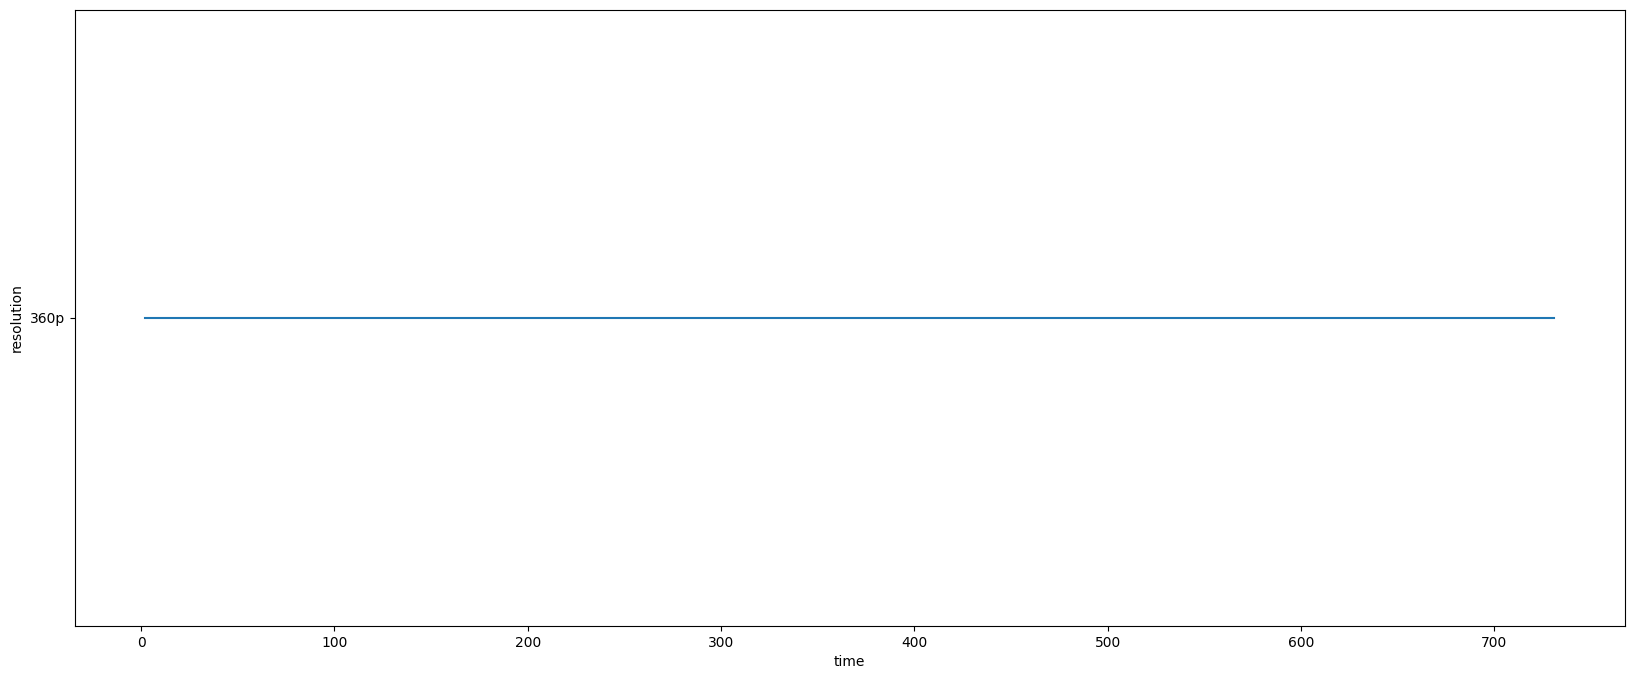

In [95]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
ax.set_yticks(np.arange(4))
ax.set_yticklabels(resolution_map.keys())
ax.plot(df['n_loop'], df['resolution'])
# ax.title.set_text('resolution vs time')
plt.xlabel('time')
plt.ylabel('resolution')

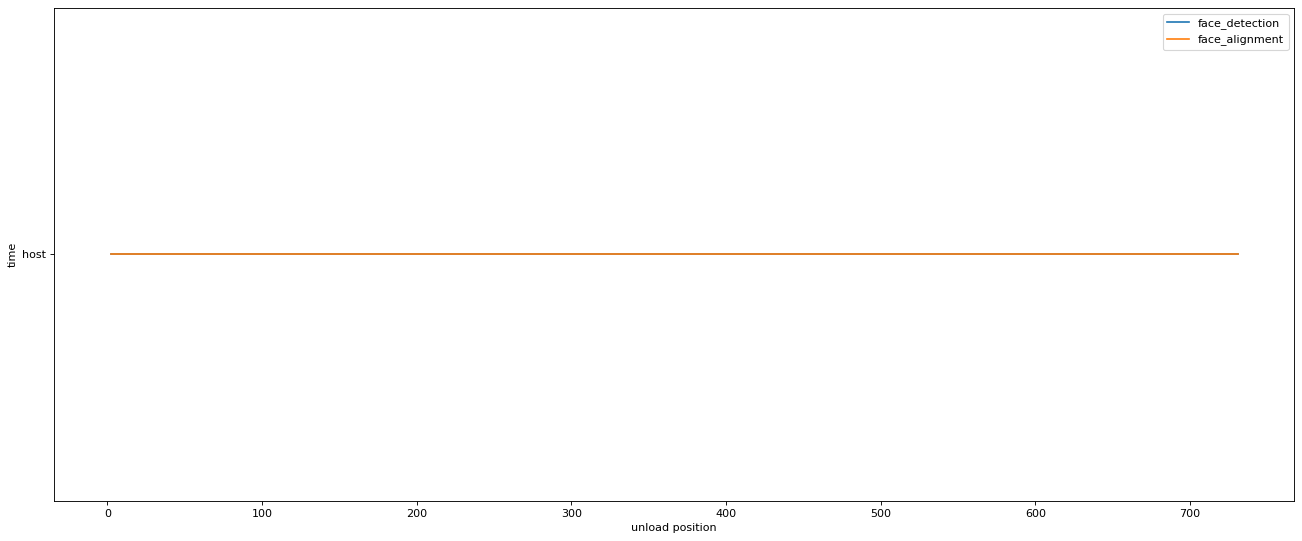

In [96]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=80)
ax.plot(df['n_loop'], df['face_detection'], label='face_detection')
ax.plot(df['n_loop'], df['face_alignment'], label='face_alignment')
# ax.title.set_text('unload position vs time')
plt.xlabel('unload position')
plt.ylabel('time')
ax.legend()